# Homework 2

Homework 2 is due on Monday, February 3.

## Written Part

**Problem 1:** Consider an $m\times n$ matrix $X$, an $m$-component vector $y$, and an $n$-component vector $\theta$. Suppose the matrix $X$ is tall and skinny, that is, suppose $m>n$. We saw in class the the gradient of the MSE cost function is proportional to $X^TX\theta-X^Ty = X^T(X\theta-y)$. This quantity can be computed two different ways: 

**Way 1:**
1. Compute the matrix product $X^TX$
2. Compute the matrix-vector product $(X^TX)\theta$
3. Compute the matrix-vector product $X^Ty$
4. Subtract the vector $X^Ty$ from the vector $(X^TX)\theta$

**Way 2:**
1. Compute the matrix-vector product $X\theta$
2. Subtract the vector $y$ from the vector $X\theta$
3. Compute the matrix-vector product $ X^T(X\theta-y)$

What would be the most efficient way in terms of operations (multiplications, additions, and subtractions) of computing it?



## Answer 1 ##
**Way 2** would be the more efficient way to solve the MSE because it only consists of 2 matrix-vector multiplications and 1 vector subtraction.


**Problem 2 (for M462 students):** Consider the function $f(x)=x^TMx$, where $x$ is a vector, and $M$ is an $n\times n$ matrix (possibly non-symmetric). Find the gradient of $f(x)$.  

$$
\dfrac{\partial f}{\partial x_i} 
= [0\cdots010\cdots0]Mx + x^TM
\begin{bmatrix}
0 \\ 
\vdots \\ 
0 \\ 
1 \\ 
0 \\ 
\vdots \\ 
0 
\end{bmatrix}$$


$$
\dfrac{\partial f}{\partial x_i} 
= [\text{row i of M}]x + x^T
\begin{bmatrix}
\text{col} \\
i \\
\text{of} \\ 
M \\
\end{bmatrix}
$$

$$
\dfrac{\partial f}{\partial x_i} 
= Mx + M^Tx
$$

**Problem 2 (for M562 students):** Consider two convex functions $f(x)$ and $g(x)$. Assume $g(x)$ is non-decresing. Show that the composite function $h(x)=g(f(x))$ is also convex.

**Problem 3:** Consider the MSE cost function $\mbox{MSE}(\theta)=\|y-X\theta\|_2^2$. Find the second-order partial derivatives matrix (the *Hessian matrix*)

$$
\begin{bmatrix}
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1^2} &
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1\partial \theta_2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_1\partial\theta_n} \\
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2\partial \theta_1} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2^2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_2\partial\theta_n} \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_n\partial \theta_1} & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial \theta_n\partial \theta_2} & \cdots & \dfrac{\partial^2\mbox{MSE}(\theta)}{\partial\theta_n^2}
\end{bmatrix}
$$

$$
\dfrac{2}{m}(X^T(X\theta_i - y)(X\theta_j - y)) $$

$$
\begin{bmatrix}
\dfrac{2}{m}(X^T(X\theta_1 - y)(X\theta_1 - y)) &
\dfrac{2}{m}(X^T(X\theta_1 - y)(X\theta_2- y)) & \cdots & 
\dfrac{2}{m}(X^T(X\theta_1 - y)(X\theta_n - y)) \\
\dfrac{2}{m}(X^T(X\theta_2 - y)(X\theta_1 - y))  & 
\dfrac{2}{m}(X^T(X\theta_2 - y)(X\theta_2 - y)) & \cdots &
\dfrac{2}{m}(X^T(X\theta_2 - y)(X\theta_n - y)) \\
\vdots & \vdots & \ddots & \vdots \\
\dfrac{2}{m}(X^T(X\theta_n - y)(X\theta_1 - y)) & 
\dfrac{2}{m}(X^T(X\theta_n - y)(X\theta_2 - y)) & \cdots & 
\dfrac{2}{m}(X^T(X\theta_n - y)(X\theta_n - y)) 
\end{bmatrix}
$$

## No Clue if ^^^ is correct ##


## Programming Part

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### The Iris Dataset

The *iris* dataset contains a bunch of measurements for 150 flowers representing three species of iris (setosa, versicolor and virginica).
For each flower, we have its petal length, petal width, sepal length, and sepal width, as well as its species.

In [2]:
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/iris.data'
iris_data = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','species'])
iris_data.head(5) #first 5 rows


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


Let us look at the scatterplots for each of the six pairs of measurements.

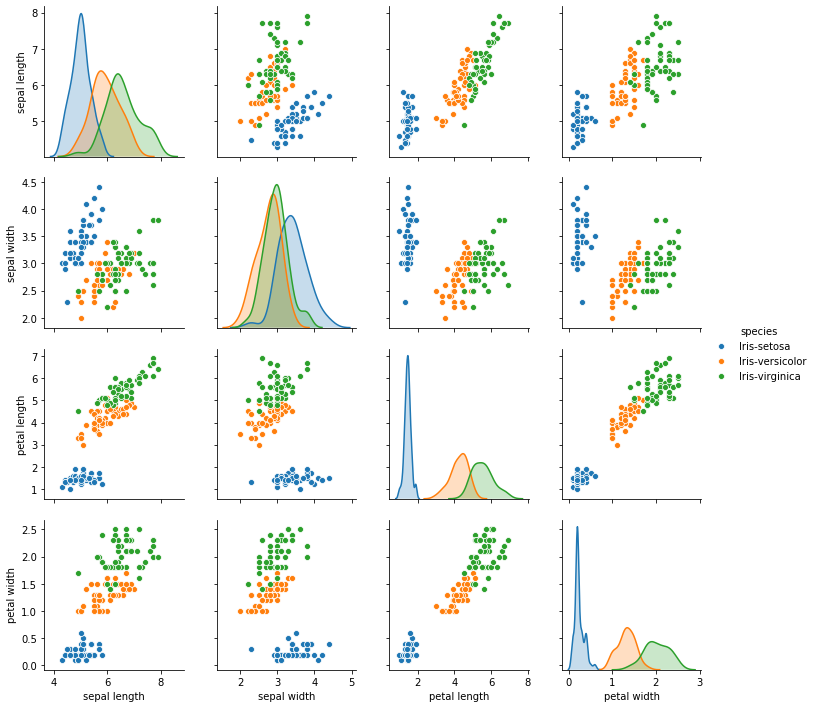

In [3]:
sns.pairplot(data=iris_data,hue='species')

### Assignments

**Part 1:** Add to the iris_data dataframe a new column called *target*. For each flower, set

$$
\mbox{target} = \left\{ \begin{array}{cc} 
1 & \mbox{ if species }=\mbox{ setosa},\\
0 & \mbox{ if species }\neq \mbox{ setosa}.
\end{array}\right.
$$

Hint: the easiest way to do is by using pandas.Series.map (see https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

In [4]:
rule = {'Iris-setosa':1, 'Iris-versicolor':0, 'Iris-virginica':0}
iris_data['target'] = iris_data['species'].map(rule)
iris_data

,sepal length,sepal width,petal length,petal width,species,target
0,5.1,3.5,1.4,0.2,Iris-setosa,1
1,4.9,3.0,1.4,0.2,Iris-setosa,1
2,4.7,3.2,1.3,0.2,Iris-setosa,1
3,4.6,3.1,1.5,0.2,Iris-setosa,1
4,5.0,3.6,1.4,0.2,Iris-setosa,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,0
146,6.3,2.5,5.0,1.9,Iris-virginica,0
147,6.5,3.0,5.2,2.0,Iris-virginica,0
148,6.2,3.4,5.4,2.3,Iris-virginica,0


**Part 2:** Use Gradient Descent to train a linear model for predicting the target values.

In [5]:
y = iris_data['target'].to_numpy()
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
X = iris_data[features].to_numpy()
X = iris_data.iloc[:,0:4]
X.head(5)



,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


**Part 3:** Write a function for predicting whether the species of an iris flower is setosa or non-setosa. Your function must use the linear model from part 2 and follow the classification rule:
1. if the predicted target value is larger than or equal to 0.5, then the species is setosa.
2. if the predicted target value is less than 0.5, then the species is not setosa.

How many non-setosa iris flowers are correctly classified as non-setosa?

all of them.

How many non-setosa iris flowers are misclassified as setosa?

none.



## linalg.lstsq ##
I tried to use gradient descent but I kept getting errors, no matter what I tried...

Text(0.5, 1.0, 'MSE=0.011744743405391328')

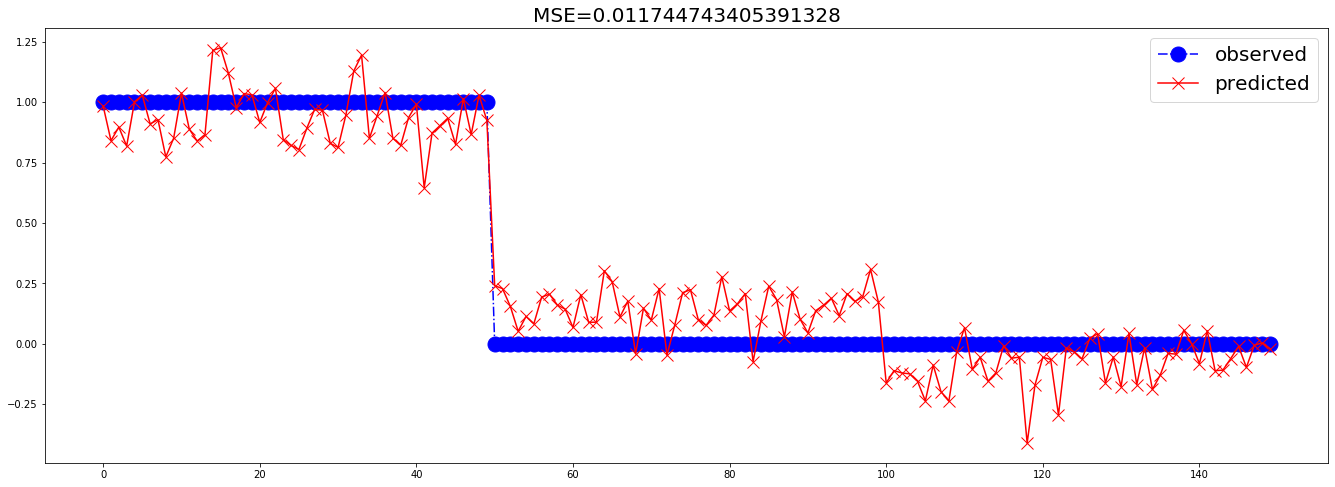

In [6]:
theta = np.linalg.lstsq(X,y,rcond=None)[0]

y_predicted = X@theta

plt.figure(figsize=(23,8))
plt.plot(y,'b-.o',markersize=15,label='observed')
plt.plot(y_predicted,'r-x',markersize=12,label='predicted')
plt.legend(fontsize=20)
MSE = np.linalg.norm(X@theta-y)/len(y)
plt.title('MSE='+str(MSE),fontsize=20)

# I would like to try training my model on part of the data 
# but I think the data would need to be shuffed then split in half 

Text(0.5, 1.0, 'MSE=0.011744743405391328')

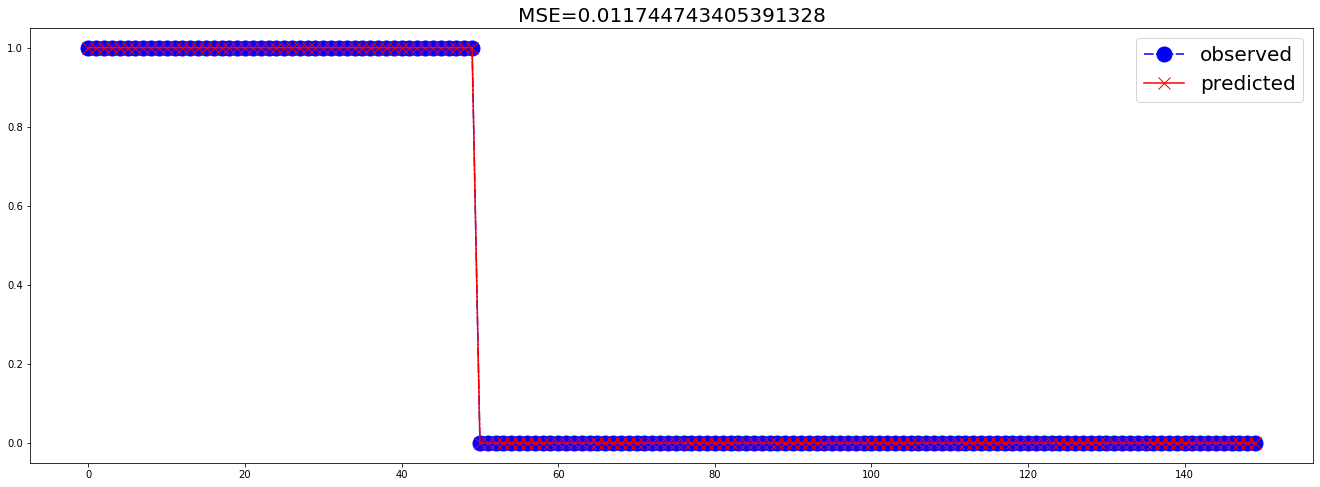

In [7]:
y_pre = y_predicted
for i in range(len(y_pre)):
    if y_pre[i] >= 0.5:
        y_pre[i] = 1
    elif y_pre[i] < 0.5:
        y_pre[i] = 0

plt.figure(figsize=(23,8))
plt.plot(y,'b-.o',markersize=15,label='observed')
plt.plot(y_pre,'r-x',markersize=12,label='predicted')
plt.legend(fontsize=20)
plt.title('MSE='+str(MSE),fontsize=20)


## Gradient Descent Retry ##

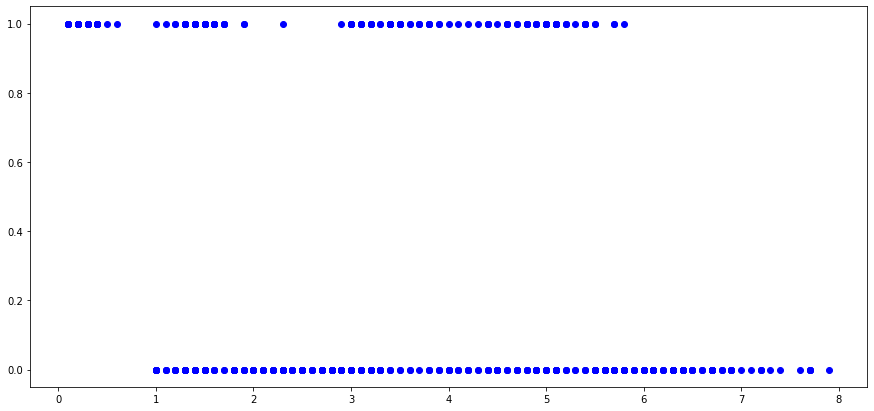

In [22]:
m = 100
x = X #X.T.iloc[0]
# print(x)
# y = 4+3*x+np.random.randn(m,1) #line + random Gaussian noise
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')


In [163]:
# X = np.c_[np.ones(m),x]
s = 0.0025 #learning rate

Text(0.5, 1.0, 'MSE = 0.22135781896528187')

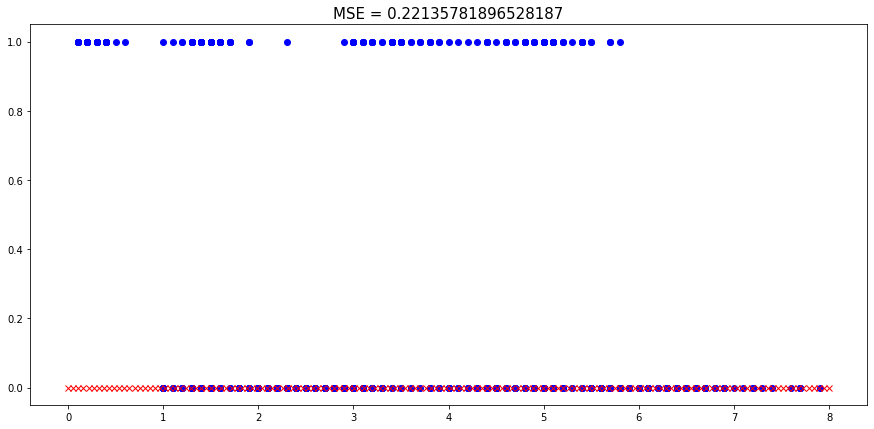

In [44]:
'Initialization'
theta = np.random.randn(4,1)
y.shape = (150,1)

# Good random theta
theta = [[-0.40195989],
 [-0.67597591],
 [ 0.70888424],
 [-0.14768247]]
theta = np.array(theta)
"MSE"
MSE = np.linalg.norm(X@theta-y)/m

# print(theta)

"plot the data and the linear model"
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

# x_plot = np.array([0,2])
x_plot = np.linspace(0, 8, 150) #plot interpolation line

y_plot = theta[0][0]+theta[1][0]*x_plot+theta[2][0]*x_plot**2+theta[3][0]*x_plot**3

# print(theta)
y_pre = X@theta
for i in range(len(y_pre)):
    if y_pre[0][i] >= 0.5:
        y_pre[0][i] = 1
    elif y_pre[0][i] < 0.5:
        y_pre[0][i] = 0
plt.plot(x_plot,y_pre,'rx')

# plt.plot(x_plot,y_plot,'r-')
plt.title('MSE = '+str(MSE),fontsize=15)

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


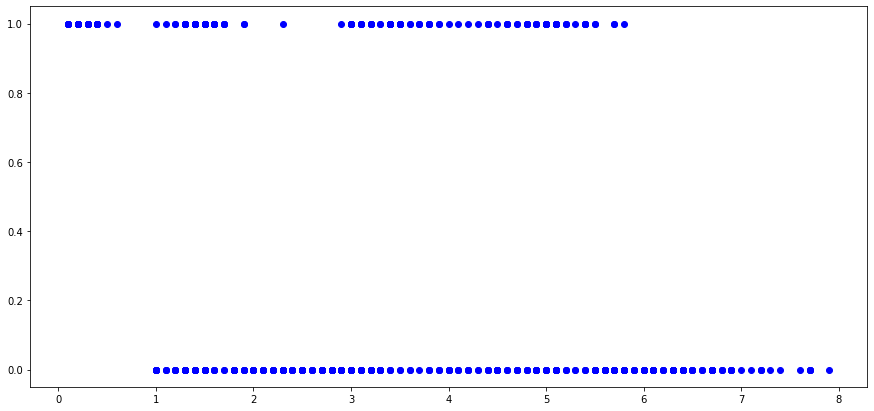

In [223]:
'Gradient Descent Step'

# for i in range(150):
#     gradient = (2/m)*X.T@(X@theta-y)
#     theta = theta - s*gradient

# print(theta)

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

x
# a = np.ones(shape=(150,1))
# x_plot = a#np.array([0,150])
# # x_plot = np.linspace(0, 8, 150) #plot interpolation line
# # theta = theta.to_numpy()
# y_plot = theta[0][0]+theta[1][0]*x_plot+theta[2][0]*x_plot**2+theta[3][0]*x_plot**3

# # print(theta)
# y_pre = X@theta
# for i in range(len(y_pre)):
#     if y_pre[0][i] >= 0.5:
#         y_pre[0][i] = 1
#     elif y_pre[0][i] < 0.5:
#         y_pre[0][i] = 0
# plt.plot(x_plot,y_pre,'rx')

# # plt.plot(x_plot,y_plot,'r-')
# plt.title('MSE = '+str(MSE),fontsize=15)

49  were correctly 1
100  were correctly 0
99.33333333333333 % were correct 


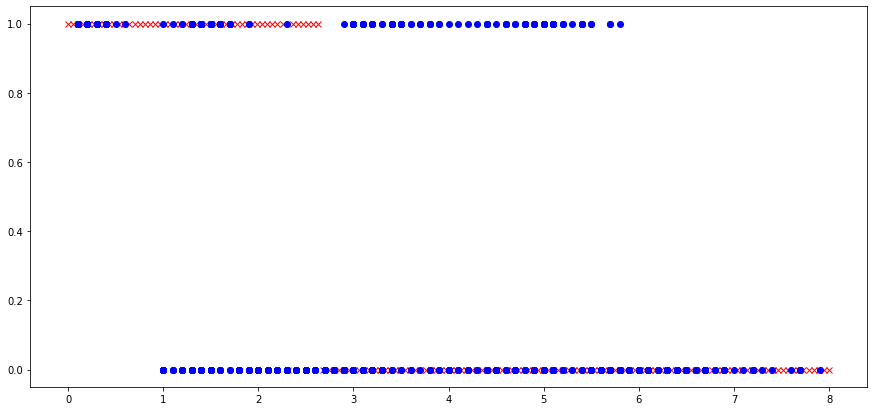

In [215]:
plt.figure(figsize=(15,7))
# print(theta)
y_pre = X@theta
y_f = 0
y_nf = 0
for i in range(len(y_pre)):
    if y_pre[0][i] >= 0.5:
        y_pre[0][i] = 1
    elif y_pre[0][i] < 0.5:
        y_pre[0][i] = 0
    if y_pre[0][i] == y[i]:
        if y[i] == 0:
            y_nf = y_nf + 1
        if y[i] == 1:
            y_f = y_f + 1
print(y_f, " were correctly 1")
print(y_nf, " were correctly 0")
print((y_f + y_nf) / 150 * 100, "% were correct ")

plt.plot(x_plot,y_pre,'rx')
plt.plot(x,y,'bo')

## Seperate ##

In [27]:
def linregression_GD(X,y,s,n_iterations):
    m,n = X.shape #size of data set, number of features
    theta = np.random.randn(n,1) #random initialization
    for iterations in range(n_iterations):
        gradient = 2*X.T@(X@theta-y[0])/m
        theta = theta - s*gradient
    return theta


Text(0.5, 1.0, 'MSE = 0.03979954950879531')

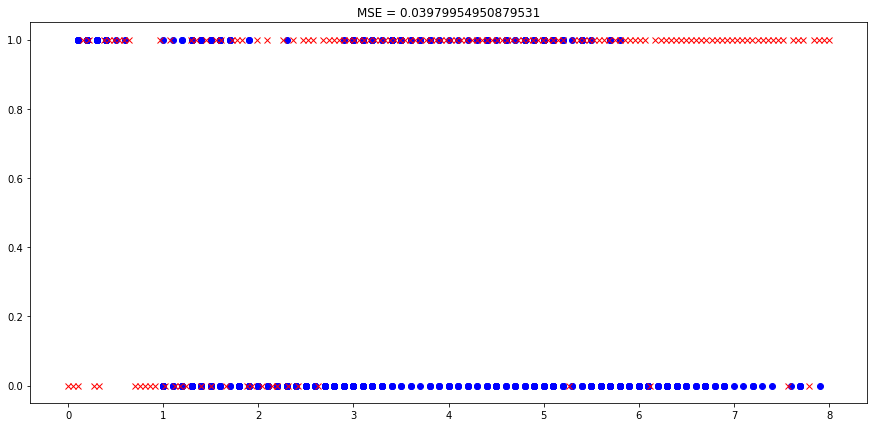

In [28]:
'test linregression_GD'
m = len(y)
s = 0.005 #learning rate
n_iterations = 50 #number of Gradient Descent iterations
theta = linregression_GD(X,y,s,n_iterations)
theta = theta.to_numpy()

'MSE'
# print(X@theta-y[0])
MSE = np.linalg.norm(X@theta-y[0])/m
# "plot the data and the linear model"
plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')
x_plot = np.linspace(0, 8, 150) #plot interpolation line
y_plot = theta[0]+theta[1]*x_plot+theta[2]*x_plot**2+theta[3]*x_plot**3

# print(theta)
y_pre = X@theta
for i in range(len(y_pre)):
    if y_pre[0][i] >= 0.5:
        y_pre[0][i] = 1
    elif y_pre[0][i] < 0.5:
        y_pre[0][i] = 0
plt.plot(x_plot,y_pre,'rx')


# plt.plot(x_plot,y_plot,'r-')
plt.title('MSE = '+str(MSE))

25  were correctly 1
4  were correctly 0
19.333333333333332 % were correct 


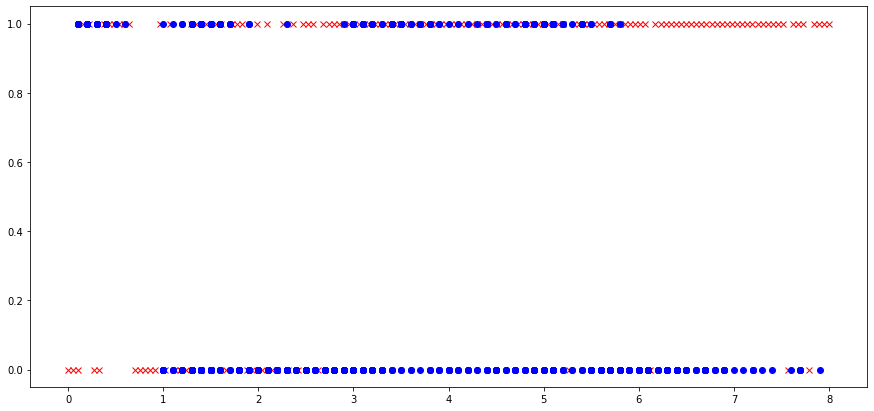

In [29]:
plt.figure(figsize=(15,7))
# print(theta)
y_pre = X@theta
y_f = 0
y_nf = 0
for i in range(len(y_pre)):
    if y_pre[0][i] >= 0.5:
        y_pre[0][i] = 1
    elif y_pre[0][i] < 0.5:
        y_pre[0][i] = 0
    if y_pre[0][i] == y[i]:
        if y[i] == 0:
            y_nf = y_nf + 1
        if y[i] == 1:
            y_f = y_f + 1
print(y_f, " were correctly 1")
print(y_nf, " were correctly 0")
print((y_f + y_nf) / 150 * 100, "% were correct ")

plt.plot(x_plot,y_pre,'rx')
plt.plot(x,y,'bo')


## Stochastic Gradient Descent Function ##
Also has a tone of errors, i can't fix them...

In [30]:
def linregression_SGD(X,y,n_epochs):
    m,n = X.shape
    theta = np.random.randn(n,1) #random initialization
    
    for epoch in range(n_epochs):
        for i in range(m):
            random_row = np.random.randint(m)
            xi = X.iloc[random_row] #ith row; 
            xi = xi[None,:] #keep xi as a row vector
            yi = y[random_row]
            gradient = 2*xi.T@(xi@theta-yi)
            s = learning_function(epoch*m+i)
            theta = theta - s*gradient
    return theta

In [31]:
#learning function hyperparameters
def learning_function(t):
    return s0/(t+s1)

[[-5.01611594e+128]
 [ 5.13355249e+128]
 [ 6.82277345e+128]
 [-1.00895046e+129]]


Text(0.5, 1.0, 'MSE = 1.7807281387481251e+127')

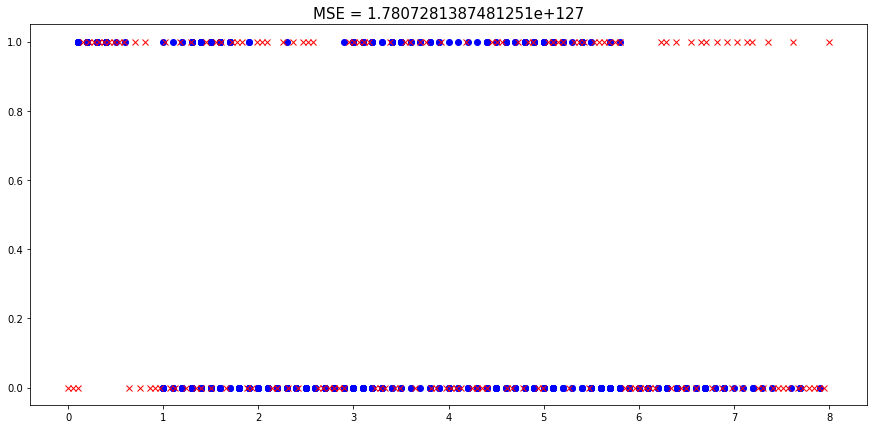

In [32]:
'testing linregression_SGD'
n_epochs = 1000
s0,s1 = 5,20
theta = linregression_SGD(X,y,n_epochs)

"MSE"
MSE = np.linalg.norm(X@theta-y)/m

plt.figure(figsize=(15,7))
plt.plot(x,y,'bo')

x_plot = np.linspace(0, 8, 150) #plot interpolation line
y_plot = theta[0]+theta[1]*x_plot+theta[2]*x_plot**2+theta[3]*x_plot**3
# y_plot = theta[0]+theta[1]*x_plot

print(theta)
y_pre = X@theta
# y_f = 0
# y_nf = 0
for i in range(len(y_pre)):
    if y_pre[0][i] >= 0.5:
        y_pre[0][i] = 1
    elif y_pre[0][i] < 0.5:
        y_pre[0][i] = 0
#     if y_pre[0][i] == y[i]:
#         if y[i] == 0:
#             y_nf = y_nf + 1
#         if y[i] == 1:
#             y_f = y_f + 1
# print(y_f + " were predicted 1")
# print(y_nf + " were predicted 0")
plt.plot(x_plot,y_pre,'rx')

# plt.plot(x_plot,y_plot,'r-')
plt.title('MSE = '+str(MSE),fontsize=15)

28  were correctly 1
55  were correctly 0
55.333333333333336 % were correct 


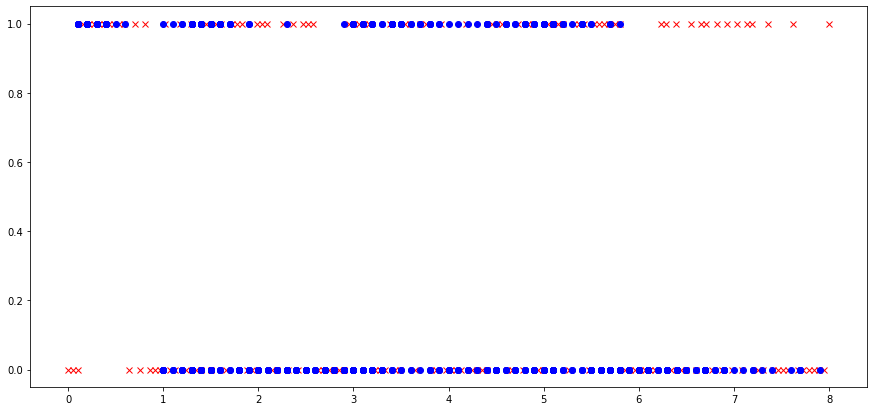

In [33]:
plt.figure(figsize=(15,7))
# print(theta)
y_pre = X@theta
y_f = 0
y_nf = 0
for i in range(len(y_pre)):
    if y_pre[0][i] >= 0.5:
        y_pre[0][i] = 1
    elif y_pre[0][i] < 0.5:
        y_pre[0][i] = 0
    if y_pre[0][i] == y[i]:
        if y[i] == 0:
            y_nf = y_nf + 1
        if y[i] == 1:
            y_f = y_f + 1
print(y_f, " were correctly 1")
print(y_nf, " were correctly 0")
print((y_f + y_nf) / 150 * 100, "% were correct ")

plt.plot(x_plot,y_pre,'rx')
plt.plot(x,y,'bo')

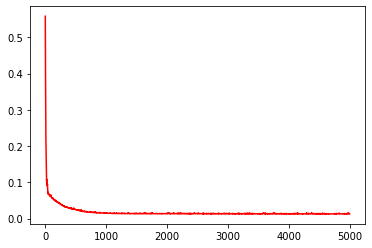

In [34]:
'Stochastic Gradient Descent (SGD)'
m = 150
n_iterations = 5000 #number of SGD steps
theta = np.random.rand(4,1) #random initialization
MSE = np.zeros((n_iterations,1)) #we will compute the MSE function after each SGD step
s = 0.1 #learning rate

for i in range(n_iterations):
    random_row = np.random.randint(m) #pick a random integer in [0,m-1]
    xi = X.iloc[random_row] #ith row; 
    xi = xi[None,:] #keep xi as a row vector
    yi = y[random_row]
    gradient = (2/m)*xi.T@(xi@theta-yi)
    theta = theta - s*gradient
    MSE[i] = np.linalg.norm(y-X@theta)/m
    
plt.plot(MSE,'r-')